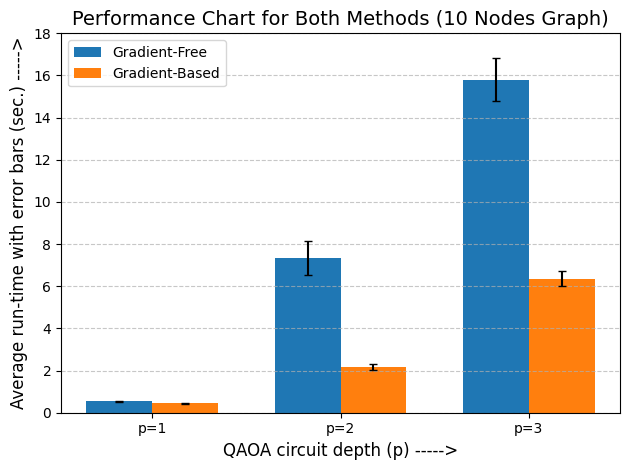

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# time taken by Gradient free optimizer(COBYLA): A1 = 1 layer; A2 = 2 layers; A3 = 3 layers
A1 = [0.7,0.6,0.6,0.6,0.6,0.7,0.5,0.6,0.5,0.5,0.8,0.4,0.4,0.5,0.6,0.5,0.5,0.6,0.7,0.5,0.4,
      0.5,0.5,0.5,0.5,0.6,0.5,0.5,0.5,0.5,0.6]
A2 = [4.9,1.2,6.1,3.1,10.1,1.1,2.5,16.4,17.3,9.8,2.3,2.3,18.2,4.8,5.4,7.6,17.6,5.2,6.1,3.8,5.9,11.3,
      4.9,4.9,13.5,2.4,4.4,17.7,1.5,5.3,1.6,14.6,16.9,3.1,8.2,5.7,3.5,1.3,1.5,18.0,9.5,2.5,16.9,7.0,4.5,10.6,2.7]
A3 = [5.6,15.2,19.7,19.9,4.5,20.8,17.1,19.9,19.6,15.8,20.1,13.7,8.5,20.5,20.8,20.3,17.3,
      19.8,20.8,16.0,9.0,20.9,20.8,16.0,9.0,20.9,20.8,4.0,20.7,21.0,3.3,17.6,20.5,4.5,8.4]

# time taken by Gradient based optimizer(BFGS): B1 = 1 layer; B2 = 2 layers; B3 = 3 layers
B1 = [0.7, 0.3, 0.8, 0.9, 0.5, 0.9, 0.4, 0.8, 0.6, 0.7, 1.0, 0.4, 0.5, 0.3, 0.3, 0.4, 0.3,
       0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.4, 0.5, 0.4, 0.6, 0.4, 0.5, 0.3, 0.5, 0.4, 0.5, 0.6,
         0.4, 0.3, 0.5, 0.3, 0.7, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.5, 0.4, 0.3, 0.4, 0.4, 0.3,
           0.2, 0.6, 0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.4, 0.4,0.5, 0.6, 0.4, 0.3,
             0.5, 0.3, 0.7, 0.6, 0.3, 0.4, 0.6, 0.5, 0.3, 0.5, 0.4, 0.3, 0.4, 0.4, 0.3, 0.2, 0.6,
               0.3, 0.3, 0.4, 0.4, 0.4, 0.3, 0.3, 0.4, 0.5, 0.4, 0.4]
B2 = [1.9, 2.4, 1.4, 3.0, 2.6, 3.5, 1.7, 2.1, 2.1, 1.4, 1.6, 2.2, 1.3, 1.6, 1.5, 2.3, 1.8, 2.3,
       1.7, 3.5, 2.0, 1.3, 2.6, 3.3, 3.5, 1.6, 3.8, 1.8, 1.4, 1.6, 2.3 ]
B3 = [4.9, 5.7, 5.0, 9.7, 7.4, 5.8, 4.4, 2.4, 5.4, 6.3, 6.2, 6.2, 7.8, 4.8, 9.8, 6.7, 9.3, 8.4,
       5.7, 8.3, 3.9, 6.7, 5.9, 6.9, 8.0, 3.1, 5.1, 3.5, 9.1, 9.5, 5.1]


AA = np.zeros([3,6])
def f(A1):
    mean = np.mean(A1)
    std_dev = np.std(A1, ddof=1)
    sem = std_dev/np.sqrt(len(A1))
    BB = np.zeros(3)
    BB[0] = (float(mean))
    BB[1] = (float(std_dev))
    BB[2] = (float(sem))
    return BB

for j in range(0,3,1):
    AA[j][0] = f(A1)[j]
    AA[j][1] = f(A2)[j]
    AA[j][2] = f(A3)[j]
    AA[j][3] = f(B1)[j]
    AA[j][4] = f(B2)[j]
    AA[j][5] = f(B3)[j]

# X-axis labels
x = np.array(["p=1", "p=2", "p=3"])  # X-axis positions
vals = [AA[0][:3], AA[0][3:]]  # Mean values for Gradient-Free and Gradient-Based
y_err = [AA[2][:3], AA[2][3:]]  # errorbars values for Gradient-Free and Gradient-Based

# Bar chart settings
bar_width = 0.35  # Width of each bar
x_indices = np.arange(len(x))  # Indices for groups

# Plotting the bars
plt.bar(x_indices - bar_width / 2, vals[0], bar_width, yerr=y_err[0], capsize=3, label='Gradient-Free')
plt.bar(x_indices + bar_width / 2, vals[1], bar_width, yerr=y_err[1], capsize=3, label='Gradient-Based')

# Adding labels, title, and grid
plt.xlabel('QAOA circuit depth (p) ----->', fontsize=12)
plt.ylabel('Average run-time with error bars (sec.) ----->', fontsize=12)
plt.title('Performance Chart for Both Methods (10 Nodes Graph)', fontsize=14)
plt.xticks(x_indices, x, fontsize=10)  # Set x-axis tick labels to `x`
plt.yticks(np.arange(0, 20, 2), fontsize=10)  # Dynamically adjust y-ticks
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(loc='best', fontsize=10)

# Display the chart
plt.tight_layout()
